In [1]:
## Loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf ## Yahoo finance data

In [3]:
!pip install finta

In [4]:
from finta import TA
## for feature engineering purposes. It will tell us what features we can 
## extract from a particular stock

#### Loading data

In [5]:
symbol="SPY"
obj=yf.Ticker(symbol)
data=obj.history()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-07-12 00:00:00-04:00,446.390015,447.480011,444.910004,446.019989,91924500,0.0,0.0,0.0
2023-07-13 00:00:00-04:00,447.899994,450.380005,447.450012,449.559998,72425200,0.0,0.0,0.0
2023-07-14 00:00:00-04:00,450.480011,451.359985,448.489990,449.279999,69761800,0.0,0.0,0.0
2023-07-17 00:00:00-04:00,449.130005,451.929993,449.079987,450.839996,52680200,0.0,0.0,0.0
2023-07-18 00:00:00-04:00,450.500000,454.859985,450.049988,454.190002,80744400,0.0,0.0,0.0


* open- what particular price that stock opened on that day
* high- highest price of the stock on that particular day
* low- lowest price of that particular stock on that day
* close- price the stock closed on that particular day

In [6]:
data.shape

(23, 8)

In [7]:
import datetime

In [8]:
## define the parameters
symbol="SPY"
num_days=15000

interval='1d' 
start_date=str(datetime.date.today()-datetime.timedelta(num_days))
end_date=str(datetime.date.today())

print("Start date:", start_date)
print("End date:", end_date)

Start date: 1982-07-20
End date: 2023-08-14


In [10]:
data=obj.history(interval=interval, start=start_date, end=end_date)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,25.047175,25.047175,24.922562,25.029373,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,25.047175,25.207392,25.047175,25.207392,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,25.189600,25.278609,25.136194,25.260807,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,25.296399,25.545624,25.278597,25.527822,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.616838,25.688045,25.332009,25.634640,531500,0.0,0.0,0.0


In [12]:
data.shape

(7689, 8)

In [13]:
data.to_csv('stocks.csv',index='False')

In [71]:
df=pd.read_csv('stocks.csv')

In [72]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,1993-01-29 00:00:00-05:00,25.047175,25.047175,24.922562,25.029373,1003200,0.0,0.0,0.0
1,1993-02-01 00:00:00-05:00,25.047175,25.207392,25.047175,25.207392,480500,0.0,0.0,0.0
2,1993-02-02 00:00:00-05:00,25.189600,25.278609,25.136194,25.260807,201300,0.0,0.0,0.0
3,1993-02-03 00:00:00-05:00,25.296399,25.545624,25.278597,25.527822,529400,0.0,0.0,0.0
4,1993-02-04 00:00:00-05:00,25.616838,25.688045,25.332009,25.634640,531500,0.0,0.0,0.0


In [73]:
df.shape

(7689, 9)

In [74]:
df=df.set_index(['Date'])

In [75]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,25.047175,25.047175,24.922562,25.029373,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,25.047175,25.207392,25.047175,25.207392,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,25.189600,25.278609,25.136194,25.260807,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,25.296399,25.545624,25.278597,25.527822,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.616838,25.688045,25.332009,25.634640,531500,0.0,0.0,0.0


In [76]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
ema50     0
ema21     0
ema15     0
ema5      0
dtype: int64

In [77]:
df.drop(columns=['Dividends','Stock Splits', 'Capital Gains'],axis=1,inplace=True)

In [78]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1993-01-29 00:00:00-05:00,25.047175,25.047175,24.922562,25.029373,1003200
1993-02-01 00:00:00-05:00,25.047175,25.207392,25.047175,25.207392,480500
1993-02-02 00:00:00-05:00,25.189600,25.278609,25.136194,25.260807,201300
1993-02-03 00:00:00-05:00,25.296399,25.545624,25.278597,25.527822,529400
1993-02-04 00:00:00-05:00,25.616838,25.688045,25.332009,25.634640,531500


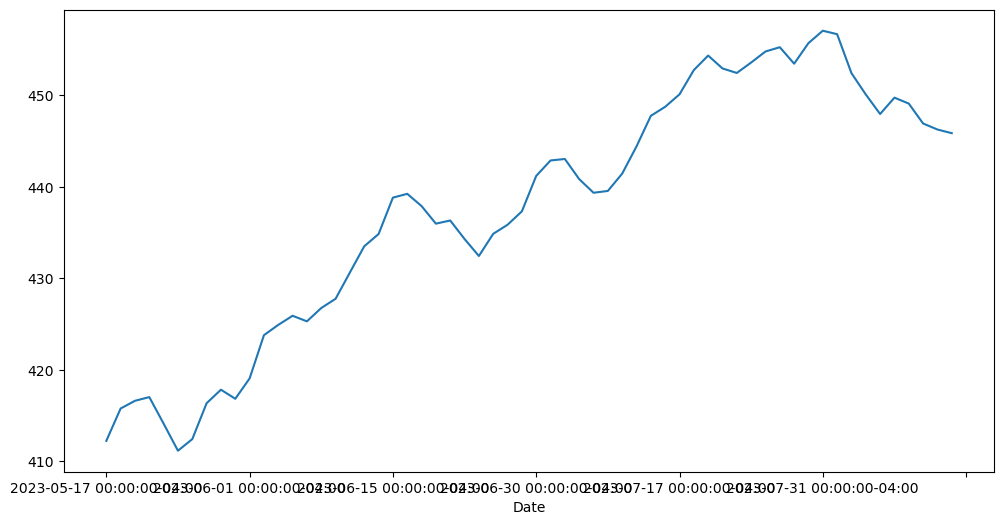

In [79]:
plt.figure(figsize= (12,6))
tmp=data.iloc[-60:]
tmp['Close'].plot()
plt.show()

#### Exponential smoothing-> formula= alpha*y(t)+(1-alpha)*y(t-1)

In [80]:
df=df.ewm(alpha=0.65).mean()
## this means that 65% of data is influenced by today's date and 35% from
## the previous date


* basically you're adding the weightage of previous values also to the current value. Must do when it comes to time series data.
* my end goal is to decide whether to buy a particular stock on that particular day or no. For my judgement, i am giving 65% weightage to my current stock as well as 35% of previous stock price. 

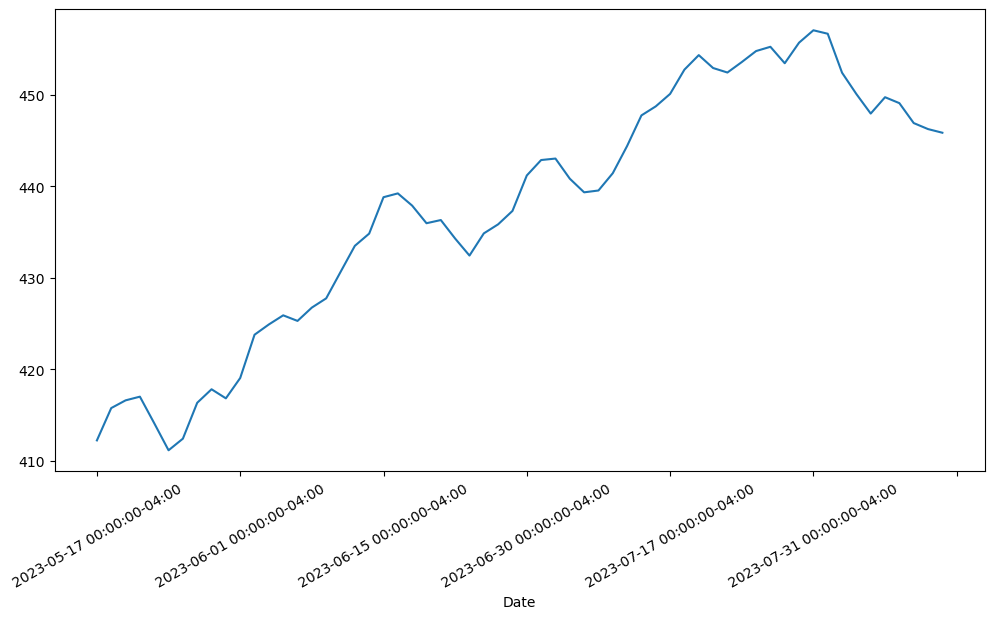

In [81]:
plt.figure(figsize= (12,6))
tmp=df.iloc[-60:]
tmp['Close'].plot()
plt.xticks(rotation=30)
plt.show()

In [82]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1993-01-29 00:00:00-05:00,25.047175,25.047175,24.922562,25.029373,1.003200e+06
1993-02-01 00:00:00-05:00,25.047175,25.165854,25.014868,25.161239,6.160148e+05
1993-02-02 00:00:00-05:00,25.143898,25.242428,25.097263,25.228857,3.343749e+05
1993-02-03 00:00:00-05:00,25.244534,25.442508,25.216926,25.426145,4.630725e+05
1993-02-04 00:00:00-05:00,25.487809,25.602950,25.292125,25.562382,5.077852e+05


In [83]:
# list of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV']

`- **RSI (Relative Strength Index):** It is a momentum indicator that compares the magnitude of recent gains to recent losses in an attempt to determine overbought and oversold conditions of an asset.

- **MACD (Moving Average Convergence Divergence):** It is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.

- **STOCH (Stochastic Oscillator):** A momentum indicator that compares a stock's closing price to its price range over a given period of time. It is used to identify overbought or oversold conditions.

- **ADL (Accumulation/Distribution Line):** A momentum indicator that uses volume flow to assess the buying and selling pressure of a security.

- **ATR (Average True Range):** A volatility indicator that measures the range between the high and low prices of a security over a given period of time.

- **MOM (Momentum Indicator):** A momentum indicator that compares the current closing price of a security to its closing price "n" periods ago.

- **MFI (Money Flow Index):** A momentum indicator that uses both price and volume to measure buying and selling pressure.

- **ROC (Rate of Change):** A momentum indicator that measures the percentage change in price over a specified period of time.

- **OBV (On-Balance Volume):** A momentum indicator that uses volume to assess the buying and selling pressure of a security.

- **CCI (Commodity Channel Index):** A momentum indicator that measures the deviation of an asset's price from its statistical mean.

- **EMV (Ease of Movement):** A volume-based indicator that is used to assess the relationship between price and volume.

In [84]:
TA.RSI(df)

Date
1993-01-29 00:00:00-05:00           NaN
1993-02-01 00:00:00-05:00    100.000000
1993-02-02 00:00:00-05:00    100.000000
1993-02-03 00:00:00-05:00    100.000000
1993-02-04 00:00:00-05:00    100.000000
                                ...    
2023-08-07 00:00:00-04:00     54.232738
2023-08-08 00:00:00-04:00     52.754195
2023-08-09 00:00:00-04:00     48.019790
2023-08-10 00:00:00-04:00     46.656969
2023-08-11 00:00:00-04:00     45.807311
Name: 14 period RSI, Length: 7689, dtype: float64

In [85]:
## FOR ALL INDICATORS
def get_indicator_data(df):
    for indicator in INDICATORS:
        indicator_data=eval('TA.'+indicator+'(data)')
        
        if not isinstance (indicator_data, pd.DataFrame):
            indicator_data=indicator_data.to_frame()
         
        df=df.merge(indicator_data,left_index=True,right_index=True)
        
        #moving averages
    df['ema50'] = df['Close'] / df['Close'].ewm(50).mean()
    df['ema21'] = df['Close'] / df['Close'].ewm(21).mean()
    df['ema15'] = df['Close'] / df['Close'].ewm(14).mean()
    df['ema5'] = df['Close'] / df['Close'].ewm(5).mean()
    
    return df


In [86]:
df=get_indicator_data(df)

In [87]:
df.head()

,Open,High,Low,Close,Volume,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,...,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV.,ema50,ema21,ema15,ema5
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.047175,25.047175,24.922562,25.029373,1.003200e+06,NaN,0.000000,0.000000,NaN,7.165714e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000
1993-02-01 00:00:00-05:00,25.047175,25.165854,25.014868,25.161239,6.160148e+05,100.0,0.002959,0.001644,NaN,1.294926e+06,...,NaN,NaN,NaN,6.160148e+05,66.666667,NaN,1.002601,1.002566,1.002536,1.002388
1993-02-02 00:00:00-05:00,25.143898,25.242428,25.097263,25.228857,3.343749e+05,100.0,0.005867,0.003374,NaN,1.566784e+06,...,NaN,NaN,NaN,9.503897e+05,87.255797,NaN,1.003489,1.003418,1.003359,1.003065
1993-02-03 00:00:00-05:00,25.244534,25.442508,25.216926,25.426145,4.630725e+05,100.0,0.014168,0.007031,NaN,1.962678e+06,...,NaN,NaN,NaN,1.413462e+06,119.168241,NaN,1.008393,1.008225,1.008083,1.007371
1993-02-04 00:00:00-05:00,25.487809,25.602950,25.292125,25.562382,5.077852e+05,100.0,0.023802,0.012020,NaN,2.337915e+06,...,NaN,NaN,NaN,1.921247e+06,110.003313,NaN,1.010895,1.010610,1.010371,1.009178


In [88]:
df.shape

(7689, 21)

In [89]:
## basic idea is that compare the current value with the previous 10 values
## if the stock price has increased then go ahead and buy the stock else no

window=10
prediction=df.shift(-window)['Close']>=df['Close']
prediction=prediction.iloc[:-window]
df['pred']=prediction.astype(int)

In [90]:
## first 10 values will be null so we drop them
df=df.dropna()

In [91]:
df.tail()

,Open,High,Low,Close,Volume,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,...,14 period MFI,ROC,OBV,20 period CCI,14 period EMV.,ema50,ema21,ema15,ema5,pred
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-24 00:00:00-04:00,453.563323,454.864758,452.210726,453.585892,5.988045e+07,76.188649,6.284401,5.969294,89.349325,4.231618e+10,...,63.029449,2.890324,4.557581e+10,105.702000,0.034184,1.074678,1.039686,1.027532,1.009244,0.0
2023-07-25 00:00:00-04:00,453.795172,456.083659,453.289251,454.791064,5.683244e+07,77.443984,6.285561,6.032548,92.897094,4.232044e+10,...,63.087515,3.513838,4.563265e+10,105.411642,0.037320,1.075897,1.040441,1.028188,1.009918,0.0
2023-07-26 00:00:00-04:00,454.233811,456.672774,453.348241,455.258379,6.607574e+07,77.929860,6.252118,6.076462,92.471506,4.233029e+10,...,70.238008,3.573147,4.569872e+10,98.858184,0.045575,1.075379,1.039548,1.027242,1.009113,0.0
2023-07-27 00:00:00-04:00,457.344827,458.471473,452.179376,453.458926,8.305287e+07,71.539508,6.011121,6.063393,75.650622,4.228101e+10,...,69.915568,2.722110,4.561567e+10,86.847320,0.046319,1.069637,1.033774,1.021603,1.004267,0.0
2023-07-28 00:00:00-04:00,456.392693,458.022015,452.381275,455.708633,8.107617e+07,74.369283,5.933266,6.037368,85.886260,4.229559e+10,...,77.180955,2.540584,4.569675e+10,87.310967,0.048691,1.073366,1.037069,1.024849,1.007696,0.0


### Prepare the model

In [92]:
x=df.drop('pred',axis=1)
y=df['pred']

In [93]:
from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=31)

In [94]:
## Importing all machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# library to plot the images in the notebook
from IPython.display import Image
from IPython.core.display import HTML 

### Logistic Regression

In [95]:
# define the parameter
parameters = {'max_iter': [100, 200, 500]}
# initialise the model
lr_classifier = LogisticRegression()
# initialise Hyperparameter tuning and Cross validation
lr_classifier_rs = RandomizedSearchCV(estimator = lr_classifier, param_distributions= parameters, cv = 5, random_state=21, verbose=1)

In [96]:
lr_classifier_rs.fit(X_train , y_train)

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=21, verbose=1)

In [99]:
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [100]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression()
Best set of parameters :  {'max_iter': 100}
Best score :  0.6307548928238582


#### Model Prediction

In [101]:
y_pred_lr = lr_classifier_rs.predict(X_test)

### Model Evaluation

In [102]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.6052173913043478


In [106]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[   0,  908],
       [   0, 1392]], dtype=int64)

### SVM

In [108]:
parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C':[1.0, 2.0]
}

svm_rs = RandomizedSearchCV(estimator = SVC(), param_distributions=parameters, cv = 5, random_state = 42, verbose = 1)

In [109]:
svm_rs.fit(X_train, y_train)

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 2.0],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   random_state=42, verbose=1)

In [110]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC()
Best set of parameters :  {'kernel': 'rbf', 'C': 1.0}
Best score :  0.6307548928238582


In [111]:
y_pred_svm = svm_rs.predict(X_test)

In [113]:
svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_svm)
print("Accuracy using Kernel SVM : ", svm_accuracy)

Accuracy using Kernel SVM :  0.6052173913043478


In [114]:
cm = confusion_matrix(y_test.values, y_pred_svm)
cm

array([[   0,  908],
       [   0, 1392]], dtype=int64)

### Decision Tree

In [115]:
parameters = {'max_depth': np.arange(2, 20, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42, cv = 5, verbose = 1)

In [116]:
dt_classifier_rs.fit(X_train, y_train)

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42, verbose=1)

In [117]:
y_pred_dt = dt_classifier_rs.predict(X_test)

In [118]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_dt)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.7343478260869565


In [120]:
cm = confusion_matrix(y_test.values,y_pred_dt)
cm

array([[ 543,  365],
       [ 246, 1146]], dtype=int64)

#### Random Forest

In [121]:
parameters = {
    'n_estimators':[110,130,140,150,160,180,200], 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42, verbose = 1, cv = 5)


In [122]:
rf_classifier_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': [110, 130, 140, 150,
                                                         160, 180, 200]},
                   random_state=42, verbose=1)

In [123]:
y_pred = rf_classifier_rs.predict(X_test)

In [124]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.8108695652173913


In [125]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[ 553,  355],
       [  80, 1312]], dtype=int64)

### Compare the model's performance

In [126]:
model_results = {
    'LR': lr_accuracy,
    'SVM': svm_accuracy,
    'DT': dt_accuracy,
    'RF': rf_accuracy
}

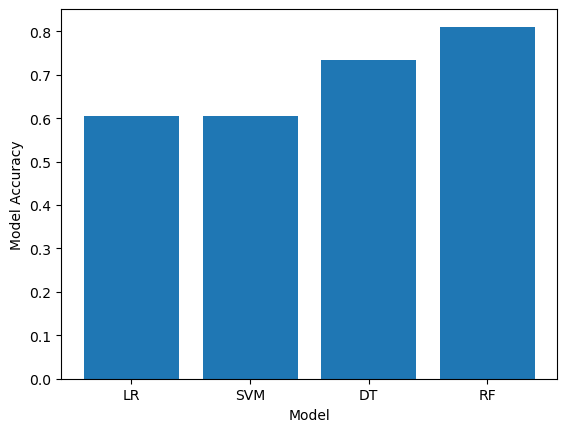

In [127]:
plt.bar(range(len(model_results)), model_results.values(), align='center')
plt.xticks(range(len(model_results)), list(model_results.keys()))
plt.ylabel("Model Accuracy")
plt.xlabel("Model")
plt.show()